In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import json

In [ ]:
# KIT corporate colors
# white,      255 255 255,    #ffffff
# black,      0 0 0,          #000000
# green,      0 150 130,      #009682
# blue,       0 100 170,      #4664aa
# maygreen,   140 182 60,     #8cb63c
# yellow,     252 229 0,      #fce500
# orange,     223 155 27,     #df9b1b
# brown,      167 130 46,     #a7822e
# red,        162 34 35,      #a22223
# purple,     163 16 124,     #a3107c
# cyan,       35 161 224,     #23a1e0

## Few Shot

In [3]:
#read all 
predictions_5 = pd.read_csv(os.path.join("few_shot/classes_5","predictions.csv"), index_col=False)
with open(os.path.join("few_shot/classes_5","results.json"), "r") as f:
        report_5 = json.load(f)

predictions_10 = pd.read_csv(os.path.join("few_shot/classes_10","predictions.csv"), index_col=False)
with open(os.path.join("few_shot/classes_10","results.json"), "r") as f:
        report_10 = json.load(f)

predictions_20 = pd.read_csv(os.path.join("few_shot/classes_20","predictions.csv"), index_col=False)
with open(os.path.join("few_shot/classes_20","results.json"), "r") as f:
        report_20 = json.load(f)

predictions_30 = pd.read_csv(os.path.join("few_shot/classes_30","predictions.csv"), index_col=False)
with open(os.path.join("few_shot/classes_30","results.json"), "r") as f:
        report_30 = json.load(f)

predictions_40 = pd.read_csv(os.path.join("few_shot/classes_40","predictions.csv"), index_col=False)
with open(os.path.join("few_shot/classes_40","results.json"), "r") as f:
        report_40 = json.load(f)

predictions_50 = pd.read_csv(os.path.join("few_shot/classes_50","predictions.csv"), index_col=False)
with open(os.path.join("few_shot/classes_50","results.json"), "r") as f:
        report_50 = json.load(f)

5 classes:  0.85
10 classes:  0.615
20 classes:  0.48375
30 classes:  0.3333333333333333
40 classes:  0.328125
50 classes:  0.271


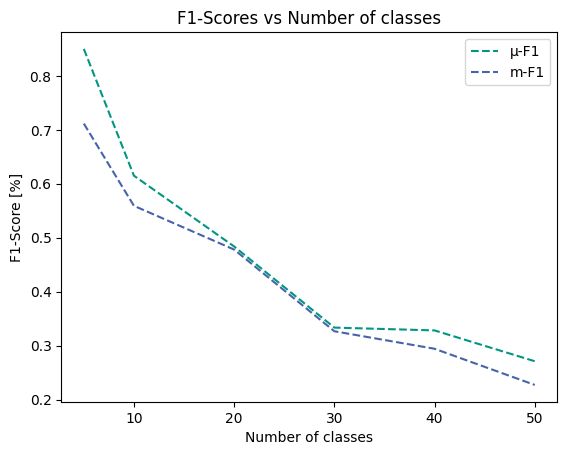

5 classes:  175.855
10 classes:  272.615
20 classes:  446.965
30 classes:  675.305
40 classes:  910.53625
50 classes:  1099.3275


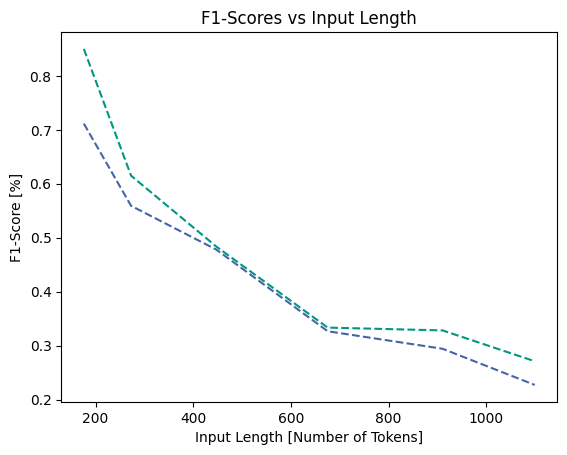

<Figure size 640x480 with 0 Axes>

In [66]:
#print all accuracies
print("5 classes: ", report_5["accuracy"])
print("10 classes: ", report_10["accuracy"])
print("20 classes: ", report_20["accuracy"])
print("30 classes: ", report_30["accuracy"])
print("40 classes: ", report_40["accuracy"])
print("50 classes: ", report_50["accuracy"])

#plot accuracies vs number of classes
macro_f1_scores = [report_5["macro avg"]["f1-score"], report_10["macro avg"]["f1-score"], report_20["macro avg"]["f1-score"], report_30["macro avg"]["f1-score"], report_40["macro avg"]["f1-score"], report_50["macro avg"]["f1-score"]]

plt.plot([5,10,20,30,40,50], [report_5["accuracy"], report_10["accuracy"], report_20["accuracy"], report_30["accuracy"], report_40["accuracy"], report_50["accuracy"]], color="#009682", label="µ-F1", linestyle="--")
plt.plot([5,10,20,30,40,50], macro_f1_scores, color="#4664aa", linestyle="--", label="m-F1")
plt.xlabel("Number of classes")
plt.ylabel("F1-Score [%]")
plt.title("F1-Scores vs Number of classes")
plt.legend()
plt.show()
plt.draw()
plt.savefig("few_shot/figs/accuracy_vs_number_classes.png")

#get the average input_tokens_length
print("5 classes: ", predictions_5["input_tokens_length"].mean())
print("10 classes: ", predictions_10["input_tokens_length"].mean())
print("20 classes: ", predictions_20["input_tokens_length"].mean())
print("30 classes: ", predictions_30["input_tokens_length"].mean())
print("40 classes: ", predictions_40["input_tokens_length"].mean())
print("50 classes: ", predictions_50["input_tokens_length"].mean())

#plot accuracies vs input_tokens_length
plt.plot([predictions_5["input_tokens_length"].mean(), predictions_10["input_tokens_length"].mean(), predictions_20["input_tokens_length"].mean(), predictions_30["input_tokens_length"].mean(), predictions_40["input_tokens_length"].mean(), predictions_50["input_tokens_length"].mean()], [report_5["accuracy"], report_10["accuracy"], report_20["accuracy"], report_30["accuracy"], report_40["accuracy"], report_50["accuracy"]], color="#009682", label="µ-F1", linestyle="--")
plt.plot([predictions_5["input_tokens_length"].mean(), predictions_10["input_tokens_length"].mean(), predictions_20["input_tokens_length"].mean(), predictions_30["input_tokens_length"].mean(), predictions_40["input_tokens_length"].mean(), predictions_50["input_tokens_length"].mean()], macro_f1_scores, color="#4664aa", linestyle="--", label="m-F1")
plt.xlabel("Input Length [Number of Tokens]")
plt.ylabel("F1-Score [%]")
plt.title("F1-Scores vs Input Length") 
plt.show()
plt.draw()
plt.savefig("few_shot/figs/accuracy_vs_input_tokens_length.png")

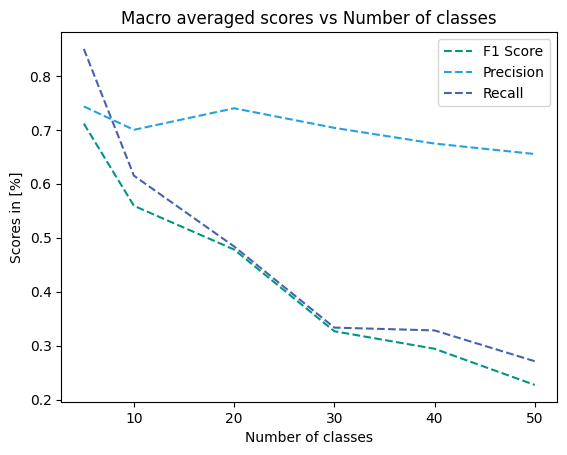

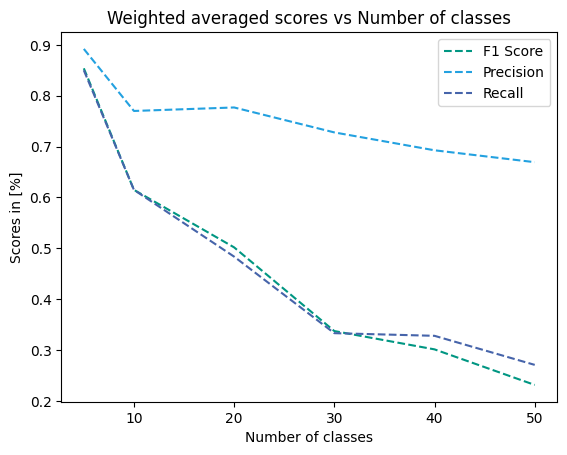

<Figure size 640x480 with 0 Axes>

In [68]:
macro_f1_scores = [report_5["macro avg"]["f1-score"], report_10["macro avg"]["f1-score"], report_20["macro avg"]["f1-score"], report_30["macro avg"]["f1-score"], report_40["macro avg"]["f1-score"], report_50["macro avg"]["f1-score"]]
macro_recalls = [report_5["macro avg"]["recall"], report_10["macro avg"]["recall"], report_20["macro avg"]["recall"], report_30["macro avg"]["recall"], report_40["macro avg"]["recall"], report_50["macro avg"]["recall"]]
macro_precisions = [report_5["macro avg"]["precision"], report_10["macro avg"]["precision"], report_20["macro avg"]["precision"], report_30["macro avg"]["precision"], report_40["macro avg"]["precision"], report_50["macro avg"]["precision"]]
plt.plot([5,10,20,30,40,50], macro_f1_scores, label="F1 Score", color="#009682", linestyle="--")
plt.plot([5,10,20,30,40,50], macro_precisions, label="Precision", color="#23a1e0", linestyle="--")
plt.plot([5,10,20,30,40,50], macro_recalls, label="Recall", color="#4664aa", linestyle="--")


plt.xlabel("Number of classes")
plt.ylabel("Scores in [%]")
plt.title("Macro averaged scores vs Number of classes")
plt.legend()
plt.gcf().savefig("few_shot/figs/macro_avg_scores_vs_number_of_classes.png")
plt.show()



weighted_f1_scores = [report_5["weighted avg"]["f1-score"], report_10["weighted avg"]["f1-score"], report_20["weighted avg"]["f1-score"], report_30["weighted avg"]["f1-score"], report_40["weighted avg"]["f1-score"], report_50["weighted avg"]["f1-score"]]
weighted_recalls = [report_5["weighted avg"]["recall"], report_10["weighted avg"]["recall"], report_20["weighted avg"]["recall"], report_30["weighted avg"]["recall"], report_40["weighted avg"]["recall"], report_50["weighted avg"]["recall"]]
weighted_precisions = [report_5["weighted avg"]["precision"], report_10["weighted avg"]["precision"], report_20["weighted avg"]["precision"], report_30["weighted avg"]["precision"], report_40["weighted avg"]["precision"], report_50["weighted avg"]["precision"]]
plt.plot([5,10,20,30,40,50], weighted_f1_scores, label="F1 Score", color="#009682", linestyle="--")
plt.plot([5,10,20,30,40,50], weighted_precisions, label="Precision", color="#23a1e0", linestyle="--")
plt.plot([5,10,20,30,40,50], weighted_recalls, label="Recall", color="#4664aa", linestyle="--")


plt.xlabel("Number of classes")
plt.ylabel("Scores in [%]")
plt.title("Weighted averaged scores vs Number of classes")
plt.legend()
plt.gcf().savefig("few_shot/figs/weighted_avg_scores_vs_number_of_classes.png")
plt.show()


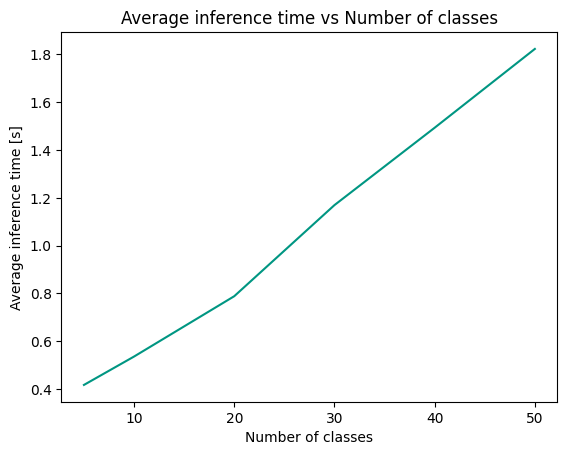

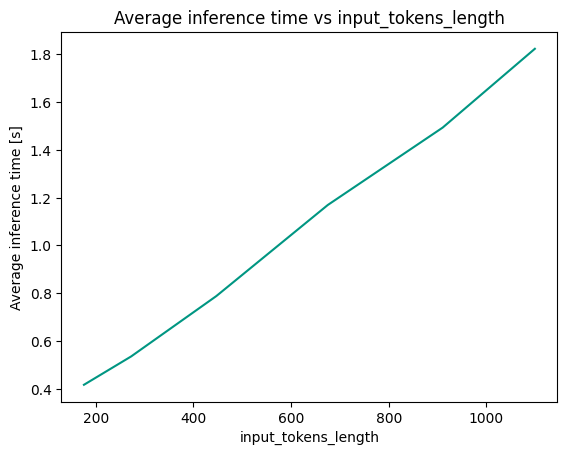

<Figure size 640x480 with 0 Axes>

In [47]:
# plot the average inference time vs number of classes
plt.plot([5,10,20,30,40,50],[predictions_5["inference_time"].mean(), predictions_10["inference_time"].mean(), predictions_20["inference_time"].mean(), predictions_30["inference_time"].mean(), predictions_40["inference_time"].mean(), predictions_50["inference_time"].mean()], color="#009682" )
plt.xlabel("Number of classes")
plt.ylabel("Average inference time [s]")
plt.title("Average inference time vs Number of classes")
plt.show()
plt.gcf().savefig("few_shot/figs/average_inference_time_vs_number_of_classes.png")

# plot the average inference time vs input_tokens_length
plt.plot([predictions_5["input_tokens_length"].mean(), predictions_10["input_tokens_length"].mean(), predictions_20["input_tokens_length"].mean(), predictions_30["input_tokens_length"].mean(), predictions_40["input_tokens_length"].mean(), predictions_50["input_tokens_length"].mean()], [predictions_5["inference_time"].mean(), predictions_10["inference_time"].mean(), predictions_20["inference_time"].mean(), predictions_30["inference_time"].mean(), predictions_40["inference_time"].mean(), predictions_50["inference_time"].mean()] , color="#009682")
plt.xlabel("input_tokens_length")
plt.ylabel("Average inference time [s]")
plt.title("Average inference time vs input_tokens_length")
plt.gcf().savefig("few_shot/figs/average_inference_time_vs_input_tokens_length.png")
plt.show()


## Enhanced Few Shot